In [1]:
# Some necessary imports.
import dcgpy
import pygmo as pg
import numpy as np
# Sympy is nice to have for basic symbolic manipulation.
from sympy import init_printing
from sympy.parsing.sympy_parser import *
init_printing()
# Fundamental for plotting.
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X = np.linspace(0,15, 100)
Y = X * ((X**3) - 18 * X + 32) / 32
Y[X>2] = 1. / X[X>2]**2
X = np.reshape(X, (100,1))
Y = np.reshape(Y, (100,1))

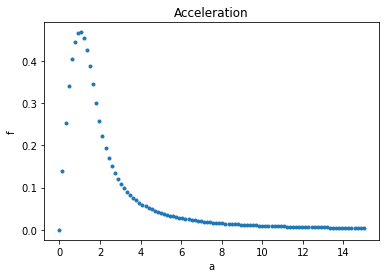

In [3]:
# And we plot them as to visualize the problem.
_ = plt.plot(X, Y, '.')
_ = plt.title('Acceleration')
_ = plt.xlabel('a')
_ = plt.ylabel('f')

In [4]:
# We define our kernel set, that is the mathematical operators we will
# want our final model to possibly contain. What to choose in here is left
# to the competence and knowledge of the user. For this particular application we want to mainly look into rational
#functions. Note we do not include the difference as that can be obtained via negative constants
ss = dcgpy.kernel_set_double(["sum", "mul","pdiv"])

In [5]:
# We instantiate the symbolic regression optimization problem (note: many important options are here not
# specified and thus set to their default values).
# Note that we allow for three constants in the final expression
udp = dcgpy.symbolic_regression(points = X, labels = Y, kernels=ss(), n_eph=3, rows =1, cols=20, levels_back=21, multi_objective=True)
print(udp)

	Data dimension (points): 1
	Data dimension (labels): 1
	Data size: 100
	Kernels: [sum, mul, pdiv]
	Loss: MSE



In [6]:
# We instantiate here the evolutionary strategy we want to use to search for models.
# In this case we use a multiple objective memetic algorithm.
uda  = dcgpy.momes4cgp(gen = 3000, max_mut = 4)

In [7]:
prob = pg.problem(udp)
algo = pg.algorithm(uda)
# Note that the screen output will happen on the terminal, not on your Jupyter notebook.
# It can be recovered afterwards from the log.
algo.set_verbosity(10)
pop = pg.population(prob, 20)

In [13]:
pop = algo.evolve(pop)

In [15]:
# This extract the population individual with lowest loss
idx = np.argmin(pop.get_f(), axis=0)[0]
print("Best loss (MSE) found is: ", pop.get_f()[idx][0])

Best loss (MSE) found is:  0.0006281946611222531


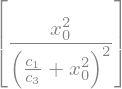

In [16]:
pop.get_f()
# Lets have a look to the symbolic representation of our model (using sympy)
parse_expr(udp.prettier(pop.get_x()[idx]))

In [17]:
# And lets see what our model actually predicts on the inputs
Y_pred = udp.predict(X, pop.get_x()[idx])

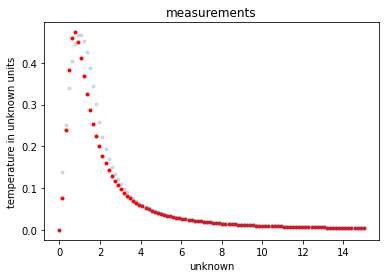

In [18]:
# Lets comapre to the data
_ = plt.plot(X, Y_pred, 'r.')
_ = plt.plot(X, Y, '.', alpha=0.2)
_ = plt.title('measurements')
_ = plt.xlabel('unknown')
_ = plt.ylabel('temperature in unknown units')

In [19]:
print("Values for the constants: ", pop.get_x()[idx][:3])

Values for the constants:  [1.75050033 5.96464614 3.31850578]
